# An Introduction to Convolutionl Neural Networks - CNN

## `Downloading requirement`

In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

## `Importing Libraries`

In [2]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation , Conv2D , MaxPool2D , Flatten
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

## `Loading and processing Hoda dataset`

In [25]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(training_sample_size=4000 , test_sample_size=1000 , size=28)

In [26]:
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)

In [27]:
x_train = x_train / 255
x_test = x_test / 255

In [28]:
x_train = x_train.reshape(-1 , 28 , 28)
x_test = x_test.reshape(-1 , 28 , 28)

In [29]:
y_train = keras.utils.to_categorical(y_train_original , num_classes=10)
y_test = keras.utils.to_categorical(y_test_original , num_classes=10)

In [30]:
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (4000, 28, 28)
x_test shape : (1000, 28, 28)
y_train shape : (4000, 10)
y_test shape : (1000, 10)


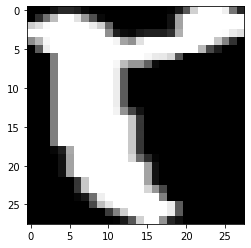

In [34]:
plt.imshow(x_train[1236] , cmap='gray')

## ` Creating the validation data`

In [35]:
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

## ` Creating and Compiling the mode`

In [38]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(Flatten())
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

In [39]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

## ` Training the model`

In [41]:
history = model.fit(x_train , y_train , batch_size=256 , epochs=50 , validation_data=(x_val , y_val))

Epoch 1/50
16/16 [==============================] - 4s 211ms/step - loss: 1.9041 - accuracy: 0.3665 - val_loss: 1.1520 - val_accuracy: 0.7400
Epoch 2/50
16/16 [==============================] - 3s 196ms/step - loss: 0.9991 - accuracy: 0.6625 - val_loss: 0.5071 - val_accuracy: 0.8300
Epoch 3/50
16/16 [==============================] - 3s 192ms/step - loss: 0.6300 - accuracy: 0.7840 - val_loss: 0.3696 - val_accuracy: 0.8750
Epoch 4/50
16/16 [==============================] - 3s 200ms/step - loss: 0.5014 - accuracy: 0.8285 - val_loss: 0.2776 - val_accuracy: 0.9050
Epoch 5/50
16/16 [==============================] - 3s 198ms/step - loss: 0.4076 - accuracy: 0.8633 - val_loss: 0.2152 - val_accuracy: 0.9250
Epoch 6/50
16/16 [==============================] - 3s 201ms/step - loss: 0.3313 - accuracy: 0.8898 - val_loss: 0.1707 - val_accuracy: 0.9450
Epoch 7/50
16/16 [==============================] - 3s 202ms/step - loss: 0.2863 - accuracy: 0.9013 - val_loss: 0.1501 - val_accuracy: 0.9350
Epoch 

## `Visualization and Evaluation`

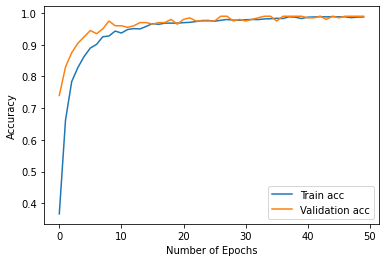

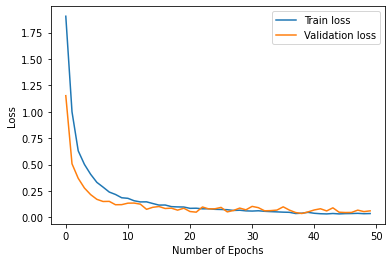

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc , label='Train acc')
plt.plot(val_acc , label='Validation acc')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(loss , label='Train loss')
plt.plot(val_loss , label='Validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
loss , acc = model.evaluate(x_test , y_test)
print(f'Test loss : {loss:.2f} , Test accuracy : {acc:.2f}')

25/25 [==============================] - 0s 12ms/step - loss: 0.0603 - accuracy: 0.9825
Test loss : 0.06 , Test accuracy : 0.98


## `Predicting test samples`

In [49]:
# Sample range 0-799
sample = 326

predicted_proba = model.predict(np.array([x_test[sample]]))
predicted = np.argmax(predicted_proba)
actual = np.argmax(y_test[sample])

print(f'Predicted probablites for sample number {sample} is :\n {predicted_proba}')
print(f'Sample number {sample} is : {actual} and model predicted : {predicted}')

Predicted probablites for sample number 326 is :
 [[1.2082289e-08 4.1057535e-09 9.9804902e-01 1.9505353e-03 3.2193469e-07
  1.5624284e-12 6.8130404e-08 2.3929710e-08 8.1934085e-13 8.7244708e-12]]
Sample number 326 is : 2 and model predicted : 2
